In [1]:
# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ファイルの読み込み
sales = pd.read_csv('../Data/daily_country_sales.csv')

In [3]:
# データの確認
sales.info()
print(sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     200 non-null    object
 1   country  194 non-null    object
 2   sales    175 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB
         date  country  sales
0  2023-02-02  America  153.0
1  2023-10-10    China  127.0
2  2023-08-27  America    NaN
3  2023-06-10    Korea    NaN
4  2023-06-08  America  149.0


In [4]:
# データの確認
print(sales['country'].unique())
sales.isnull()

['America' 'China' 'Korea' 'USA' 'United States of America' 'Japan' nan]


,date,country,sales
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,False
...,...,...,...
195,False,False,False
196,False,False,False
197,False,False,False
198,False,False,False


In [5]:
# dateカラムをobject型からdatetime型に変える
sales['date'] = pd.to_datetime(sales['date'])

In [6]:
# sales の文字NAを欠損に置換 → 数値化
sales['sales'] = sales['sales'].replace({'N/A': None, '-': None})
sales['sales'] = pd.to_numeric(sales['sales'], errors='coerce')

In [7]:
# 欠損値を含む行を削除する
sales = sales.dropna(subset=['sales', 'country'])

In [8]:
# year_month を「月初日の datetime」にしておく
sales['year_month'] = sales['date'].dt.to_period('M').dt.to_timestamp()

In [9]:
# 表記を統一する
sales['country'] = sales['country'].replace(['United States of America', 'USA'], 'America')

In [10]:
# 国と月ごとに売り上げを集計する
grouped_country = sales.groupby(['country', 'year_month'], as_index=False)['sales'].sum()

In [11]:
# それぞれの国のデータを格納する
China_data   = grouped_country[grouped_country['country'] == 'China'  ].sort_values('year_month')
Japan_data   = grouped_country[grouped_country['country'] == 'Japan'  ].sort_values('year_month')
Korea_data   = grouped_country[grouped_country['country'] == 'Korea'  ].sort_values('year_month')
America_data = grouped_country[grouped_country['country'] == 'America'].sort_values('year_month')

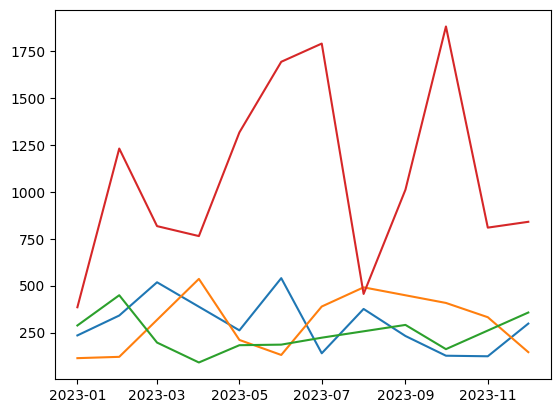

In [12]:
# それぞれの国のグラフを1つに描く
plt.plot(China_data['year_month'], China_data['sales'], label='China')
plt.plot(Japan_data['year_month'], Japan_data['sales'], label='Japan')
plt.plot(Korea_data['year_month'], Korea_data['sales'], label='Korea')
plt.plot(America_data['year_month'], America_data['sales'], label='America')

C:\Users\WithR\AppData\Local\Temp\ipykernel_20736\1759404059.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


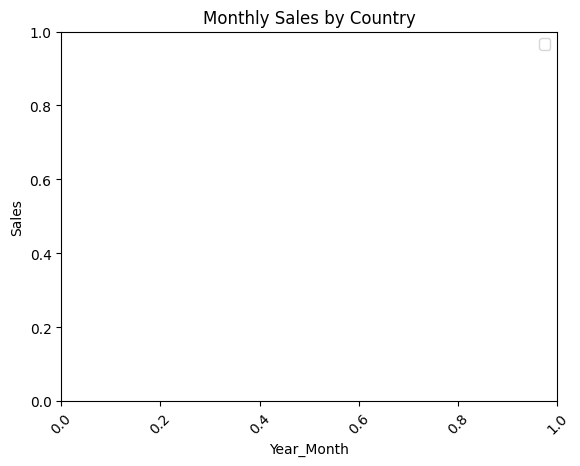

In [13]:
# データを見やすくする
plt.title('Monthly Sales by Country')
plt.xlabel('Year_Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 今日の学び

## 学んだ内容
- `isnull()`, `unique()`, `replece()`, `dropna()`など、データの前処理に使う関数を学んで使えるようになった。

## 躓いた点
- 月ごとの売上を国別に折れ線グラフで描こうとしたところ、グラフの線が月順に揃わず、前後に飛んだりズレて表示される問題が発生した。
- 原因は year_month を文字列のまま x 軸に渡していたため、Matplotlib が カテゴリ軸として処理してしまい、国ごとに月の順序がバラバラに扱われていたからだった。

## 解決方法
- year_month を datetime 型（月初日の Timestamp） に変換し、必ず時系列順にソートしてから描画するようにした。
- sales 列の "N/A" や "-" を欠損に変換して数値化することで、集計やグラフ化が安定するようになった。

## 所感
- x 軸を文字列のまま使うとカテゴリ扱いになるため、時系列データを正しく扱いたいときは必ず datetime 型に変換してソートする必要がある。
- 欠損値や表記ゆれをきちんと前処理することで、分析や可視化がスムーズに行えるようになる。
- データ分析では「なぜグラフが意図通りにならないのか」と思った時、データ型・並び順・前処理の3つを確認することが重要だと感じた。